In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

IMPORTING THE DATASET

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: >

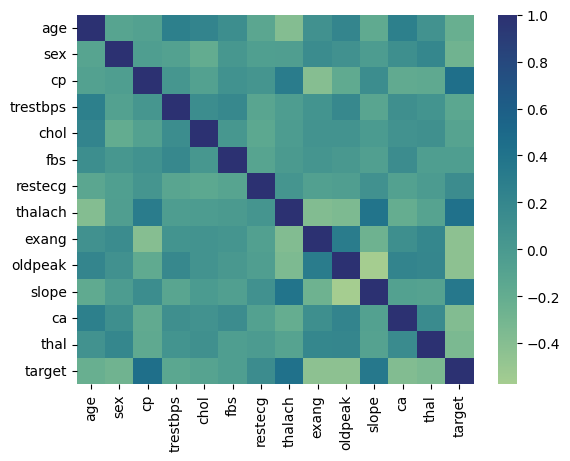

In [130]:
sns.heatmap(df.corr(), cmap = 'crest')

GETTING INPUTS AND OUTPUTS

In [131]:
X = df.iloc[:,:-1] # Independent Variables
y = df.iloc[:,-1] # Dependent Variables

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FEATURE SCALING

In [133]:
y = df.target
X = df.drop('target',axis=1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [135]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

TRAINING DATASET AND TEST DATA SET

In [136]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy =",lr_acc_score*100 ,'\n')
print( "Error rate =",(1-lr_acc_score)*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 98  25]
 [ 10 124]]


Accuracy = 86.38132295719845 

Error rate = 13.618677042801552 

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       123
           1       0.83      0.93      0.88       134

    accuracy                           0.86       257
   macro avg       0.87      0.86      0.86       257
weighted avg       0.87      0.86      0.86       257



In [137]:
print('Coefficiants =',lr.coef_)

Coefficiants = [[-0.13718131 -0.86576345  0.82278411 -0.25951533 -0.27462221 -0.00383482
   0.30902537  0.46936124 -0.47552538 -0.69371109  0.25199832 -0.72197582
  -0.57115012]]


In [138]:
 print('Intercepot =',lr.intercept_)

Intercepot = [-0.10467829]


<function matplotlib.pyplot.show(close=None, block=None)>

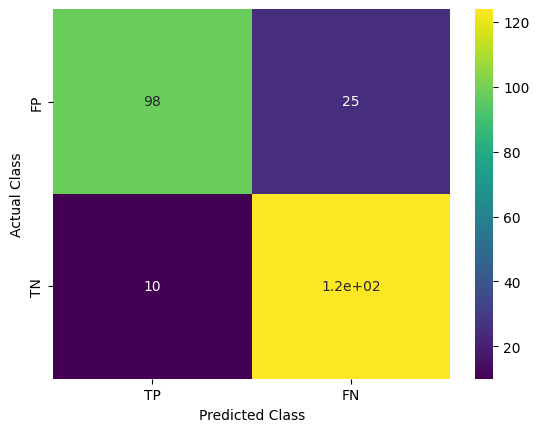

In [139]:
sns.heatmap(lr_conf_matrix , cmap= 'viridis', annot=True)
plt.xticks(np.arange(2)+0.5 , ["TP","FN"])
plt.yticks(np.arange(2)+0.5 , ["FP","TN"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show

In [140]:
lr_predict_proba = lr.predict_proba(X_test)

In [141]:
lr_predict_proba_0 = lr_predict_proba [:,1]

In [142]:
fpr , tpr , threshold = metrics.roc_curve(y_test, lr_predict_proba_0, pos_label=1)
roc_auc = auc(fpr, tpr)

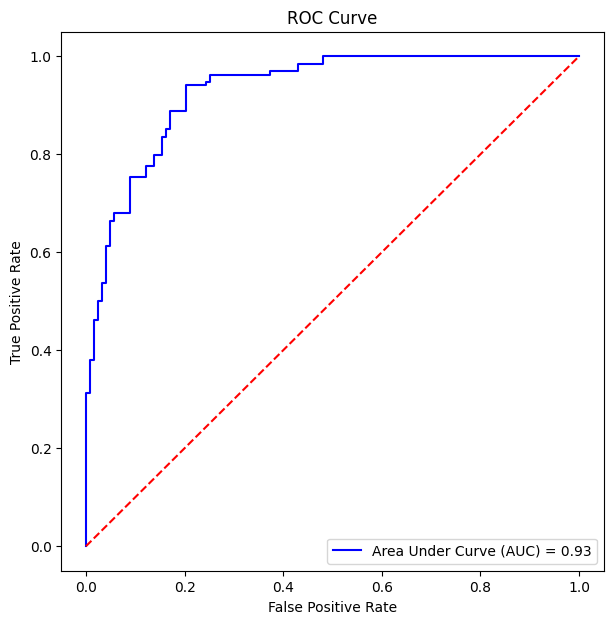

In [143]:
plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'Area Under Curve (AUC) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=670)
knn_model = knn.fit(X_train , y_train)

ACCURACY

In [145]:
m2 = 'KNN'
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predict))

confussion matrix
[[ 81  42]
 [  2 132]]


Accuracy of Logistic Regression: 82.87937743190662 

              precision    recall  f1-score   support

           0       0.98      0.66      0.79       123
           1       0.76      0.99      0.86       134

    accuracy                           0.83       257
   macro avg       0.87      0.82      0.82       257
weighted avg       0.86      0.83      0.82       257



BUILDING AND TRAINING THE MODEL

<function matplotlib.pyplot.show(close=None, block=None)>

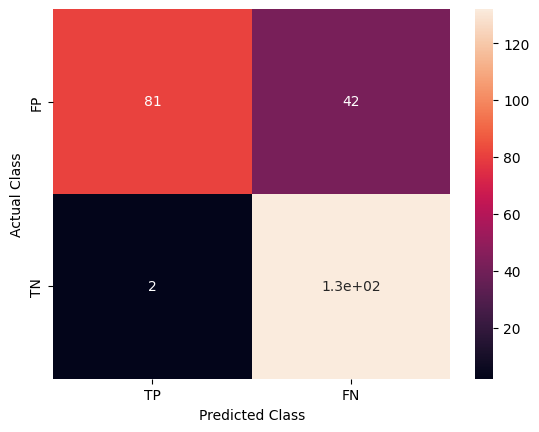

In [146]:
sns.heatmap(knn_conf_matrix , cmap= 'rocket', annot=True)
plt.xticks(np.arange(2)+0.5 , ["TP","FN"])
plt.yticks(np.arange(2)+0.5 , ["FP","TN"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show

In [147]:
knn_predict_proba = knn.predict_proba(X_test)

In [148]:
knn_predict_proba_0 = knn_predict_proba [:,1]

In [149]:
fpr , tpr , threshold = metrics.roc_curve(y_test, knn_predict_proba_0, pos_label=1)
roc_auc = auc(fpr, tpr)

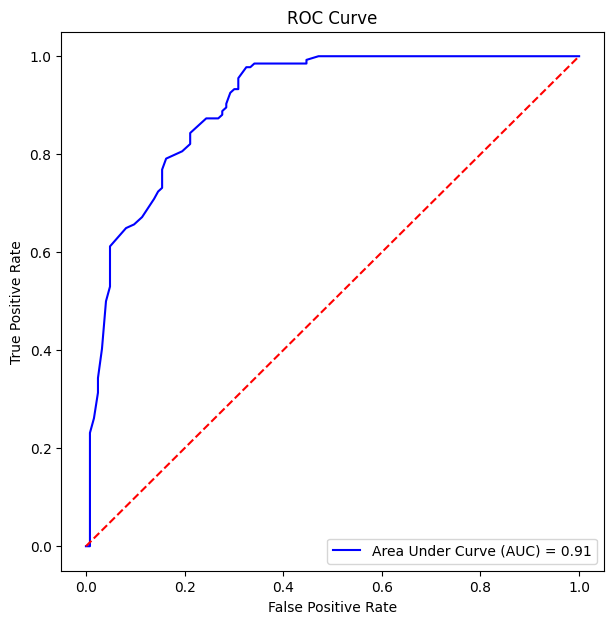

In [150]:
plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'Area Under Curve (AUC) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

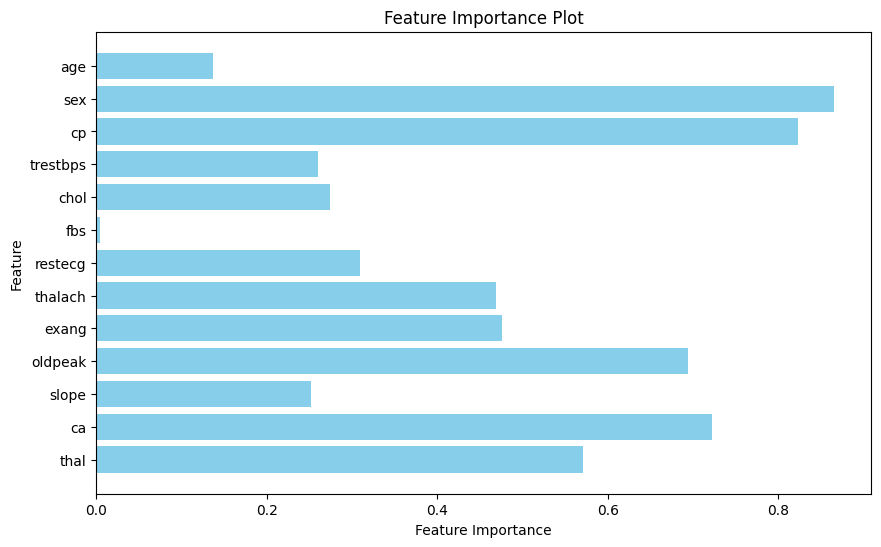

In [151]:
feature_importance = np.abs(model.coef_[0])
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()